<span style="font-family: serif;font-size: 28px;">DATA COLLECTION</span>

In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("CDC_Diabetes_Dataset.csv")

# Show info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

<span style="font-family: serif;font-size: 28px;">DATA UNDERSTANDING</span>

1. Getting all the distinct values present in the each of the features (including target variable)

In [19]:
for col in df.columns:
    print(col, np.sort(df[col].unique()))

Diabetes_012 [0. 1. 2.]
HighBP [0. 1.]
HighChol [0. 1.]
CholCheck [0. 1.]
BMI [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.
 84. 85. 86. 87. 88. 89. 90. 91. 92. 95. 96. 98.]
Smoker [0. 1.]
Stroke [0. 1.]
HeartDiseaseorAttack [0. 1.]
PhysActivity [0. 1.]
Fruits [0. 1.]
Veggies [0. 1.]
HvyAlcoholConsump [0. 1.]
AnyHealthcare [0. 1.]
NoDocbcCost [0. 1.]
GenHlth [1. 2. 3. 4. 5.]
MentHlth [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
PhysHlth [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
DiffWalk [0. 1.]
Sex [0. 1.]
Age [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
Education [1. 2. 

Observations: 
- There are no continous variables, all are discrete. 
- Binary Features - HighBP, HighChol, CholCheck, Smoker, Stroke HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump,AnyHealthcare, NoDocbcCost, DiffWalk, Sex
- Ordinal Features - GenHlth, Age, Education, Income
- Discrete Numerical Features - BMI, MentHlth, PhysHlth
- Target Variable - Diabetes_012 has 3 categories



2. Target variable distribution

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x262666cd090>,
 [Text(-0.522610388648534, -0.9679247810014106, 'No Diabetes'),
  Text(0.8836232116643976, 0.6551412212705712, 'Prediabetes'),
  Text(0.46627064079623454, 0.9962889588525354, 'Diabetes')],
 [Text(-0.28506021199010945, -0.5279589714553148, '84.2%\n(213,703)'),
  Text(0.4819762972714895, 0.35734975705667515, '1.8%\n(4,631)'),
  Text(0.2543294404343097, 0.5434303411922919, '13.9%\n(35,346)')])

Text(0.5, 1.0, 'Distribution of Diabetes Status')

Text(0.5, 0.02, 'Total Data Points: 253,680')

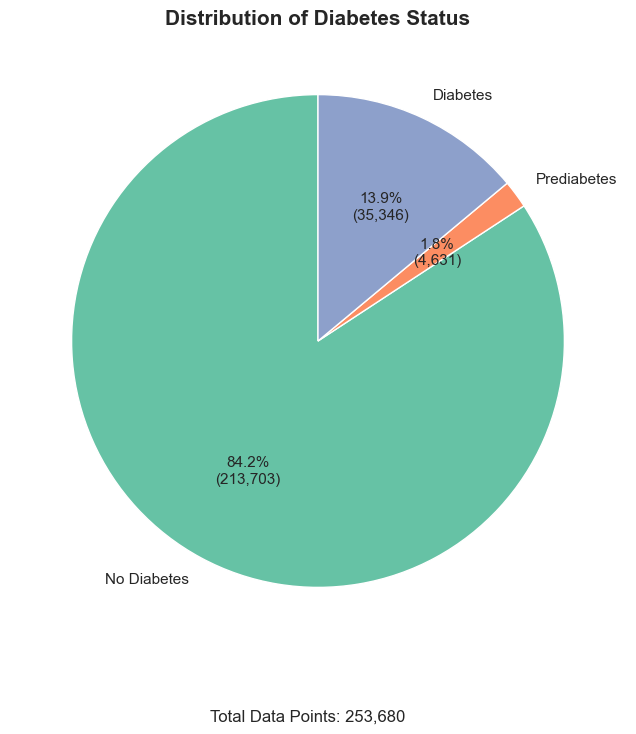

In [20]:
# Count values
counts = df['Diabetes_012'].value_counts().sort_index()

# Label mapping
labels = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Better colour palette
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # teal, orange, soft blue

# Function to show count + percentage
def autopct_format(values):
    def format(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count:,})'
    return format

# Total datapoints
total_points = counts.sum()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(counts,
        labels=labels,
        colors=colors,
        autopct=autopct_format(counts),
        startangle=90,
        textprops={'fontsize': 11})

plt.title("Distribution of Diabetes Status", fontsize=15, weight='bold')

# Add total datapoints at bottom
plt.figtext(0.5, 0.02,
            f"Total Data Points: {total_points:,}",
            ha="center",
            fontsize=12)

plt.show()


3. **Features can be categorised into,**
- **Clinical Conditions:** HighBP, HighChol, Stroke, HeartDiseaseorAttack, BMI, DiffWalk
- **Healthcare Access:** CholCheck, AnyHealthcare, NoDocbcCost
- **Lifestyle Behaviour:** Smoker, PhysActivity, Fruits, Veggies, HvyAlcoholConsump
- **General Health Status:** GenHlth, MentHlth, PhysHlth
- **Demographic Socioeconomic:** Sex, Age, Education, Income
    

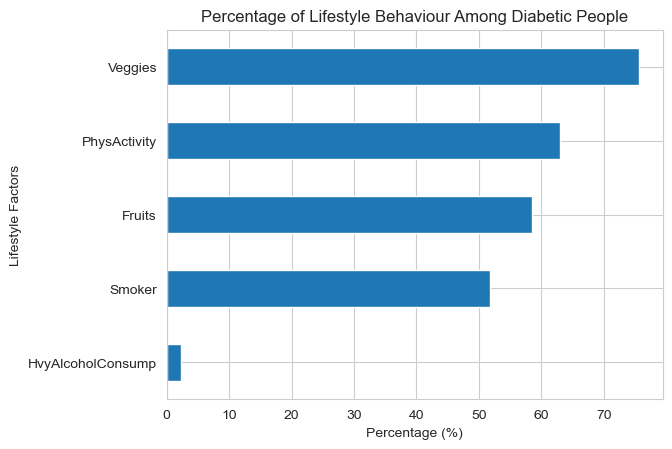

In [21]:
def plot_lifestyle_among_diabetics(df):
    
    lifestyle_cols = ["Smoker", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump"]
    
    diabetic_df = df[df["Diabetes_012"] == 2]
    
    percentages = diabetic_df[lifestyle_cols].mean() * 100
    
    percentages.sort_values().plot(kind="barh")
    
    plt.title("Percentage of Lifestyle Behaviour Among Diabetic People")
    plt.xlabel("Percentage (%)")
    plt.ylabel("Lifestyle Factors")
    plt.show()

plot_lifestyle_among_diabetics(df)

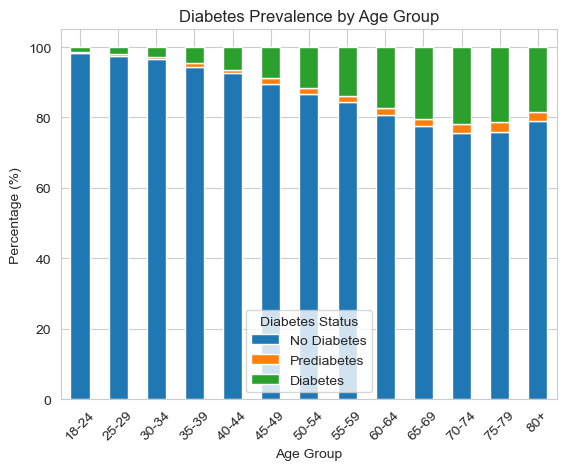

In [22]:
def plot_age_vs_diabetes(df):

    # Age mapping based on BRFSS codebook
    age_map = {
        1: "18-24",
        2: "25-29",
        3: "30-34",
        4: "35-39",
        5: "40-44",
        6: "45-49",
        7: "50-54",
        8: "55-59",
        9: "60-64",
        10: "65-69",
        11: "70-74",
        12: "75-79",
        13: "80+"
    }

    df_plot = df.copy()
    df_plot["Age_Group"] = df_plot["Age"].map(age_map)

    age_diabetes = pd.crosstab(
        df_plot["Age_Group"], 
        df_plot["Diabetes_012"], 
        normalize="index"
    ) * 100

    # Keep correct age order
    age_order = list(age_map.values())
    age_diabetes = age_diabetes.loc[age_order]

    age_diabetes.plot(kind="bar", stacked=True)


    plt.title("Diabetes Prevalence by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Percentage (%)")
    plt.legend(["No Diabetes", "Prediabetes", "Diabetes"], title="Diabetes Status")
    plt.xticks(rotation=45)
    plt.show()


plot_age_vs_diabetes(df)

<Figure size 900x600 with 0 Axes>

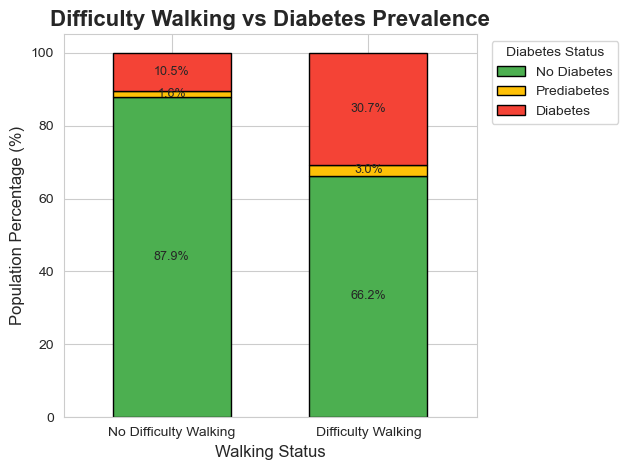

In [23]:
def plot_diffwalk_vs_diabetes(df):

    # Mapping labels
    walk_map = {
        0: "No Difficulty Walking",
        1: "Difficulty Walking"
    }

    df_plot = df.copy()
    df_plot["Walking_Status"] = df_plot["DiffWalk"].map(walk_map)

    table = pd.crosstab(
        df_plot["Walking_Status"],
        df_plot["Diabetes_012"],
        normalize="index"
    ) * 100

    walk_order = list(walk_map.values())
    table = table.loc[walk_order]


    plt.figure(figsize=(9,6))
    sns.set_style("whitegrid")

    colors = ["#4CAF50", "#FFC107", "#F44336"]

    ax = table.plot(
        kind="bar",
        stacked=True,
        color=colors,
        edgecolor="black",
        width=0.6
    )

    # Percentage labels
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=9)

    plt.title("Difficulty Walking vs Diabetes Prevalence", fontsize=16, weight="bold")
    plt.xlabel("Walking Status", fontsize=12)
    plt.ylabel("Population Percentage (%)", fontsize=12)

    plt.legend(
        ["No Diabetes", "Prediabetes", "Diabetes"],
        title="Diabetes Status",
        bbox_to_anchor=(1.02, 1),
        loc="upper left"
    )

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


plot_diffwalk_vs_diabetes(df)


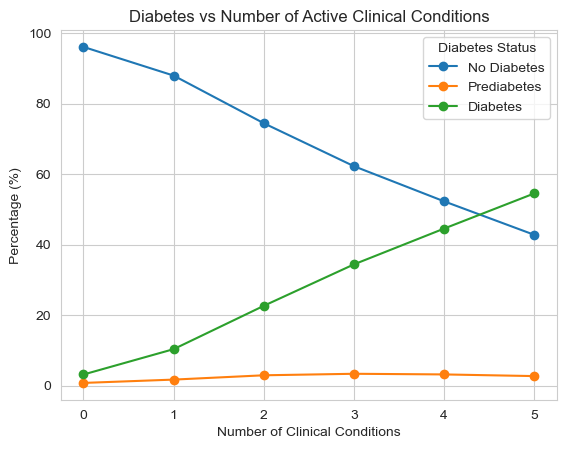

In [24]:
def plot_clinical_condition_count(df):

    clinical_cols = ["HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack", "DiffWalk"]
    
    df["Clinical_Count"] = df[clinical_cols].sum(axis=1)
    
    risk_diabetes = pd.crosstab(df["Clinical_Count"], df["Diabetes_012"], normalize="index") * 100
    
    risk_diabetes.plot(kind="line", marker="o")
    
    plt.title("Diabetes vs Number of Active Clinical Conditions")
    plt.xlabel("Number of Clinical Conditions")
    plt.ylabel("Percentage (%)")
    plt.legend(["No Diabetes", "Prediabetes", "Diabetes"], title="Diabetes Status")
    plt.show()

plot_clinical_condition_count(df)


<Figure size 1200x700 with 0 Axes>

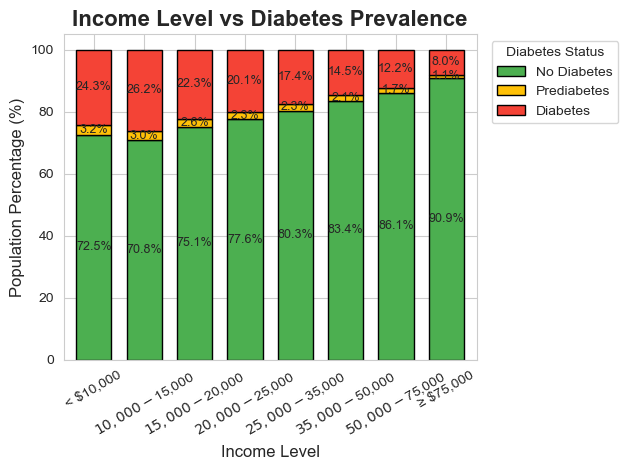

In [25]:
def plot_income_vs_diabetes(df):

    # Income mapping
    income_map = {
        1: "< $10,000",
        2: "$10,000 - $15,000",
        3: "$15,000 - $20,000",
        4: "$20,000 - $25,000",
        5: "$25,000 - $35,000",
        6: "$35,000 - $50,000",
        7: "$50,000 - $75,000",
        8: "≥ $75,000"
    }

    df_plot = df.copy()
    df_plot["Income_Level"] = df_plot["Income"].map(income_map)

    income_diabetes = pd.crosstab(
        df_plot["Income_Level"],
        df_plot["Diabetes_012"],
        normalize="index"
    ) * 100

    income_order = list(income_map.values())
    income_diabetes = income_diabetes.loc[income_order]

    # Styling
    plt.figure(figsize=(12,7))
    sns.set_style("whitegrid")

    colors = ["#4CAF50", "#FFC107", "#F44336"]   # Green → Yellow → Red

    ax = income_diabetes.plot(
        kind="bar",
        stacked=True,
        color=colors,
        edgecolor="black",
        width=0.7
    )

    # Add Percentage Labels
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=9)

    # Titles & Labels
    plt.title("Income Level vs Diabetes Prevalence", fontsize=16, weight="bold")
    plt.xlabel("Income Level", fontsize=12)
    plt.ylabel("Population Percentage (%)", fontsize=12)

    # Legend Styling
    plt.legend(
        ["No Diabetes", "Prediabetes", "Diabetes"],
        title="Diabetes Status",
        bbox_to_anchor=(1.02, 1),
        loc="upper left"
    )

    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()



plot_income_vs_diabetes(df)

<Figure size 1200x700 with 0 Axes>

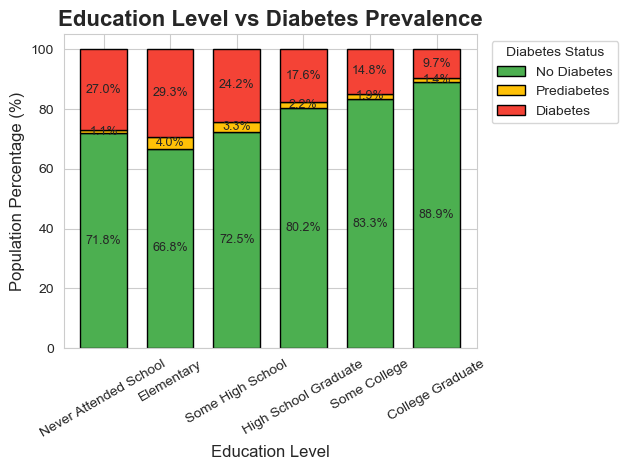

In [26]:
def plot_education_vs_diabetes(df):
    # Education mapping
    education_map = {
        1: "Never Attended School",
        2: "Elementary",
        3: "Some High School",
        4: "High School Graduate",
        5: "Some College",
        6: "College Graduate"
    }

    df_plot = df.copy()
    df_plot["Education_Level"] = df_plot["Education"].map(education_map)

    education_diabetes = pd.crosstab(
        df_plot["Education_Level"],
        df_plot["Diabetes_012"],
        normalize="index"
    ) * 100

    education_order = list(education_map.values())
    education_diabetes = education_diabetes.loc[education_order]


    # Styling
    plt.figure(figsize=(12,7))
    sns.set_style("whitegrid")

    colors = ["#4CAF50", "#FFC107", "#F44336"]   # Green → Yellow → Red

    ax = education_diabetes.plot(
        kind="bar",
        stacked=True,
        color=colors,
        edgecolor="black",
        width=0.7
    )

    # Add Percentage Labels
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=9)


    plt.title("Education Level vs Diabetes Prevalence", fontsize=16, weight="bold")
    plt.xlabel("Education Level", fontsize=12)
    plt.ylabel("Population Percentage (%)", fontsize=12)


    # Legend Styling
    plt.legend(
        ["No Diabetes", "Prediabetes", "Diabetes"],
        title="Diabetes Status",
        bbox_to_anchor=(1.02, 1),
        loc="upper left"
    )

    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


plot_education_vs_diabetes(df)

Key observations,
1. There are very few diabetic people who consume alcohol.
2. Most of diabetic people consume veggies once or more than once per day.
3. There is no proper diabetic pattern seen among the difficulty walking people.
4. The diabetic pattern is mostly seen to be in people with age of 40 and above.
5. There 100% no diabetic people with zero health issues.
6. Income and diabetes are inversely correlated.
7. People with low education level (High school and lower) are having diabetic cases.
8. Unable to understand prediabetic people behaviour due to low data points.

<span style="font-family: serif;font-size: 28px;">_____________________________________________</span>

<span style="font-family: serif;font-size: 28px;">DATA CLEANING</span>

***Check-1: Null values***

In [27]:
#checking if there are any missing values
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Clinical_Count          0
dtype: int64

***Check-1 Result:*** There are no NULL values 

***Check-2.1: Check overall duplicate values in the data frames***

In [28]:
df.duplicated().sum()

np.int64(23899)

In [29]:
# Group by target and count duplicates
duplicate_counts = df.groupby('Diabetes_012').apply(lambda x: x.duplicated().sum())

# map labels for readability
duplicate_counts.index = ['No Diabetes', 'Prediabetes', 'Diabetes']

duplicate_counts


No Diabetes    23648
Prediabetes        2
Diabetes         249
dtype: int64

Found duplicate 23,899 rows in total. Most of the duplicate rows belong to "No Diabetes" target class

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
# Group by target and count duplicates
duplicate_counts = df.groupby('Diabetes_012').apply(lambda x: x.duplicated().sum())

# map labels for readability
duplicate_counts.index = ['No Diabetes', 'Prediabetes', 'Diabetes']

duplicate_counts


No Diabetes    0
Prediabetes    0
Diabetes       0
dtype: int64

***Check-2.1 Result:***  Duplicate rows are now removed

***Check-2.2: Check whether there are same features for multiple labels***

In [33]:
X = df.drop('Diabetes_012', axis=1)
X.duplicated().sum()

np.int64(1873)

In [34]:
# Columns of input features
feature_cols = df.columns.drop('Diabetes_012').tolist()

# Define label priority (higher priority first)
label_priority = [1, 2, 0]

# Assign priority to each row
df['priority'] = df['Diabetes_012'].apply(lambda x: label_priority.index(x))

# Sort by input features + priority (highest priority first)
df = df.sort_values(by=feature_cols + ['priority']).reset_index(drop=True)

# Count unique labels per input feature combination
label_counts = df.groupby(feature_cols)['Diabetes_012'].agg(lambda x: set(x)).reset_index()
label_counts['num_labels'] = label_counts['Diabetes_012'].apply(len)

# Scenario counters
scenario_counts = {'Scenario 1':0, 'Scenario 2':0, 'Scenario 3':0, 'Scenario 4':0}

for labels in label_counts['Diabetes_012']:
    if labels == {0,1}: # Same features in labels 0 and 1
        scenario_counts['Scenario 1'] += 1
    elif labels == {0,2}: # Same features in labels 0 and 2
        scenario_counts['Scenario 2'] += 1
    elif labels == {0,1,2}: # Same features in labels 0, 1 and 2
        scenario_counts['Scenario 3'] += 1
    elif labels == {1,2}: # Same features in labels 1 and 2
        scenario_counts['Scenario 4'] += 1


print("\nNumber of cases for each scenario:")
for scenario, count in scenario_counts.items():
    print(f"{scenario}: {count}")


Number of cases for each scenario:
Scenario 1: 268
Scenario 2: 1497
Scenario 3: 39
Scenario 4: 30


The number of rows with same input features for,
- Scenario 1: 268 duplicated input features rows found for Label 0 and 1
- Scenario 2: 1497 duplicated input features rows found for Label 0 and 2
- Scenario 3: 39 duplicated input features rows found for Label 0, 1 and 2
- Scenario 4: 30 duplicated input features rows found for Label 1 and 2  

In [35]:
# Drop duplicates keeping highest priority
df = df.drop_duplicates(subset=feature_cols, keep='first').drop(columns=['priority']).reset_index(drop=True)

In [36]:
X = df.drop('Diabetes_012', axis=1)
X.duplicated().sum()

np.int64(0)

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x262694c0b90>,
 [Text(-0.5718120004869797, -0.9396973108927569, 'No Diabetes'),
  Text(0.9427419193890281, 0.5667783282966027, 'Prediabetes'),
  Text(0.5107285309093166, 0.9742465641279991, 'Diabetes')],
 [Text(-0.3118974548110798, -0.5125621695778673, '82.6%\n(188,251)'),
  Text(0.514222865121288, 0.3091518154345105, '2.0%\n(4,629)'),
  Text(0.278579198677809, 0.5314072167970904, '15.4%\n(35,028)')])

Text(0.5, 1.0, 'Distribution of Diabetes Status')

Text(0.5, 0.02, 'Total Data Points: 227,908')

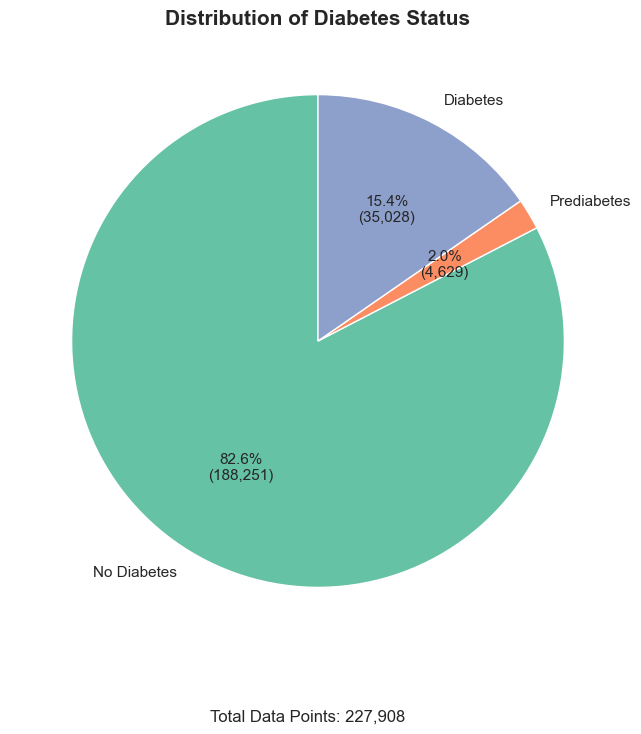

In [37]:
import matplotlib.pyplot as plt

# Count values
counts = df['Diabetes_012'].value_counts().sort_index()

# Label mapping
labels = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Better colour palette
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # teal, orange, soft blue

# Function to show count + percentage
def autopct_format(values):
    def format(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count:,})'
    return format

# Total datapoints
total_points = counts.sum()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(counts,
        labels=labels,
        colors=colors,
        autopct=autopct_format(counts),
        startangle=90,
        textprops={'fontsize': 11})

plt.title("Distribution of Diabetes Status", fontsize=15, weight='bold')

# Add total datapoints at bottom
plt.figtext(0.5, 0.02,
            f"Total Data Points: {total_points:,}",
            ha="center",
            fontsize=12)

plt.show()


***Check-3: Outliers***

In [38]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Clinical_Count'],
      dtype='object')

Possible outliers can be present in: 'BMI', 'MentHlth', 'PhysHlth'

In [39]:
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

for col in ['BMI', 'MentHlth', 'PhysHlth']:
    print(col, iqr_outliers(df[col]).shape[0])
    print("Min:", min(df[col]), "Max:", max(df[col]))

BMI 5637
Min: 12.0 Max: 98.0
MentHlth 36162
Min: 0.0 Max: 30.0
PhysHlth 34340
Min: 0.0 Max: 30.0


***Check-3 Result:*** Although outliers are present, it is better if they are included. Since, these extreme values help model to understand the health condition of a person.


<span style="font-family: serif;font-size: 28px;">FEATURE ENGINEERING</span>

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='BMI', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of BMI')

Text(0.5, 0, 'BMI')

Text(0, 0.5, 'Count')

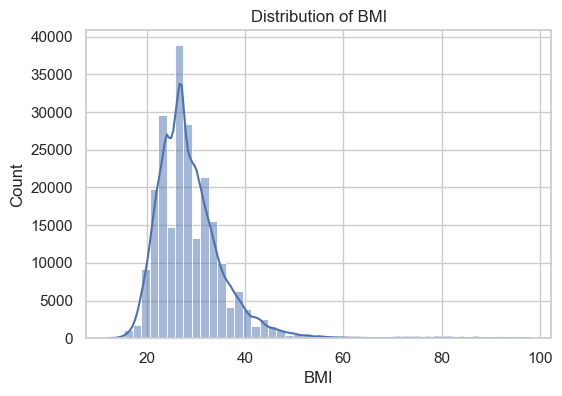

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='MentHlth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MentHlth')

Text(0.5, 0, 'MentHlth')

Text(0, 0.5, 'Count')

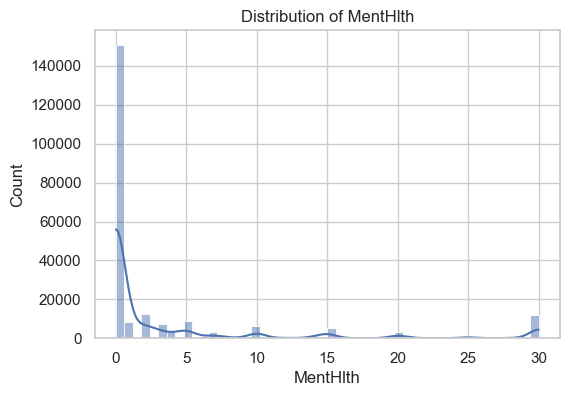

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='PhysHlth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of PhysHlth')

Text(0.5, 0, 'PhysHlth')

Text(0, 0.5, 'Count')

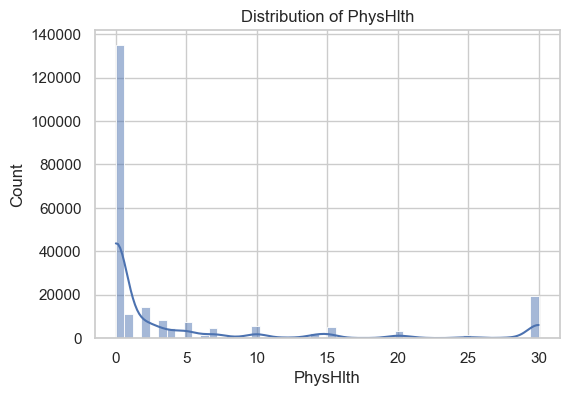

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

for col in ["BMI", "MentHlth", "PhysHlth"]:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


<Figure size 600x400 with 0 Axes>

<Axes: xlabel='BMI', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of BMI (Robust Scaled)')

Text(0.5, 0, 'BMI')

Text(0, 0.5, 'Count')

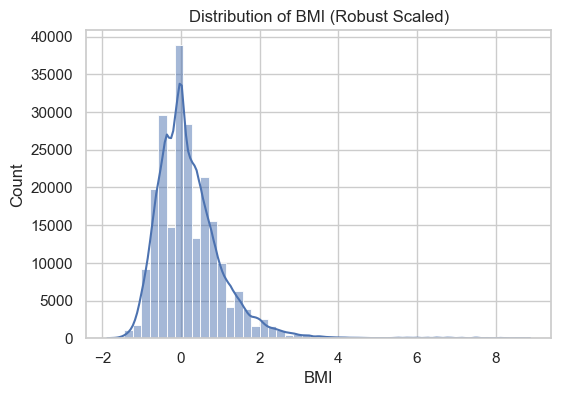

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='MentHlth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MentHlth (Robust Scaled)')

Text(0.5, 0, 'MentHlth')

Text(0, 0.5, 'Count')

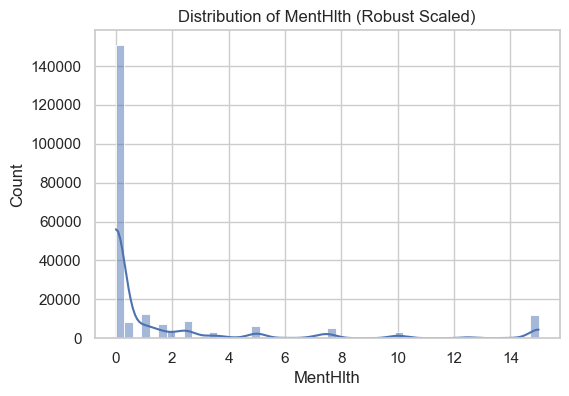

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='PhysHlth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of PhysHlth (Robust Scaled)')

Text(0.5, 0, 'PhysHlth')

Text(0, 0.5, 'Count')

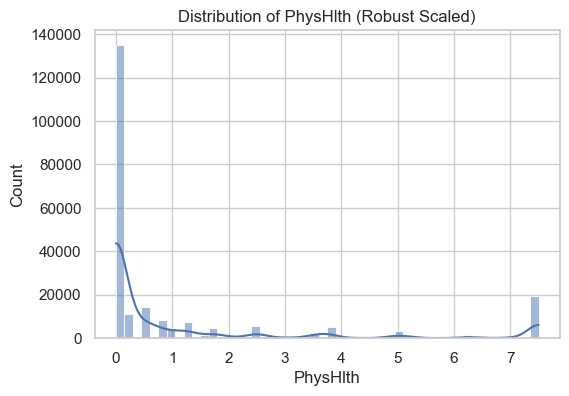

In [41]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

cols = ["BMI", "MentHlth", "PhysHlth"]

df_scaled = df.copy()
df_scaled[cols] = scaler.fit_transform(df[cols])

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_scaled[col], bins=50, kde=True)
    plt.title(f"Distribution of {col} (Robust Scaled)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

<span style="font-family: serif;font-size: 28px;">FEATURE BALANCING</span>

Diabetes_012
0.0    188251
1.0      4629
2.0     35028
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Diabetes Status (0: No, 1: Pre, 2: Yes)')

Text(0.0, 188251.5, '188251')

Text(1.0, 4629.5, '4629')

Text(2.0, 35028.5, '35028')

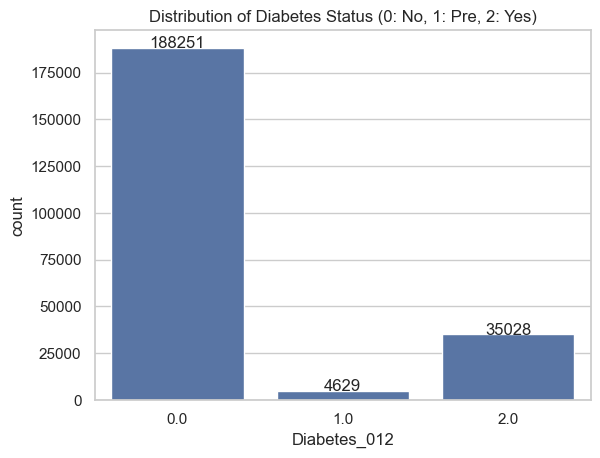

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

#check the target variable of the original dataset
df['Diabetes_012'].value_counts().sort_index()

# Create the countplot
ax = sns.countplot(x='Diabetes_012', data=df)
plt.title("Distribution of Diabetes Status (0: No, 1: Pre, 2: Yes)")

# Add counts on top of the bars
for p in ax.patches:
    count = int(p.get_height())  # get the height of each bar
    ax.text(x=p.get_x() + p.get_width()/2,   # x position
            y=p.get_height() + 0.5,          # y position (slightly above the bar)
            s=str(count),                    # text to display
            ha='center')                     # horizontal alignment

plt.show()


In [ ]:
target_col = "Diabetes_012"

categorical_cols = [
    "HighBP", "HighChol", "CholCheck", "Smoker",
    "Stroke", "HeartDiseaseorAttack", "PhysActivity",
    "Fruits", "Veggies", "HvyAlcoholConsump",
    "AnyHealthcare", "NoDocbcCost", "DiffWalk",
    "Sex"
]

numerical_cols = [
    "BMI", "GenHlth", "MentHlth", "PhysHlth",
    "Age", "Education", "Income"
]




Diabetes_binary
0    188251
1     39657
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Diabetes Status (0: No, 1: Yes)')

Text(0.0, 188251.5, '188251')

Text(1.0, 39657.5, '39657')

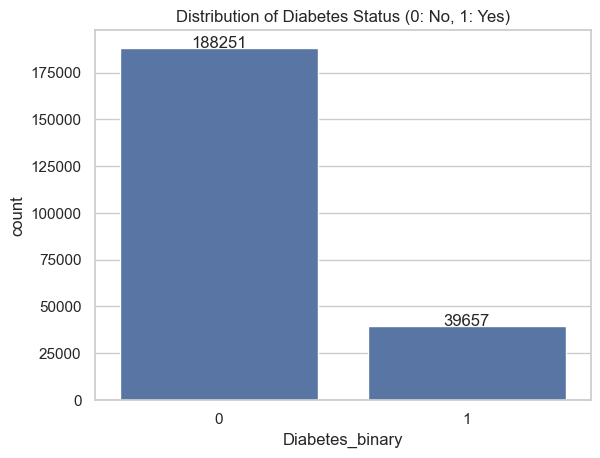

In [26]:
df["Diabetes_binary"] = (df["Diabetes_012"] > 0).astype(int)

import seaborn as sns
import matplotlib.pyplot as plt

#check the target variable of the original dataset
df['Diabetes_binary'].value_counts().sort_index()

# Create the countplot
ax = sns.countplot(x='Diabetes_binary', data=df)
plt.title("Distribution of Diabetes Status (0: No, 1: Yes)")

# Add counts on top of the bars
for p in ax.patches:
    count = int(p.get_height())  # get the height of each bar
    ax.text(x=p.get_x() + p.get_width()/2,   # x position
            y=p.get_height() + 0.5,          # y position (slightly above the bar)
            s=str(count),                    # text to display
            ha='center')                     # horizontal alignment

plt.show()


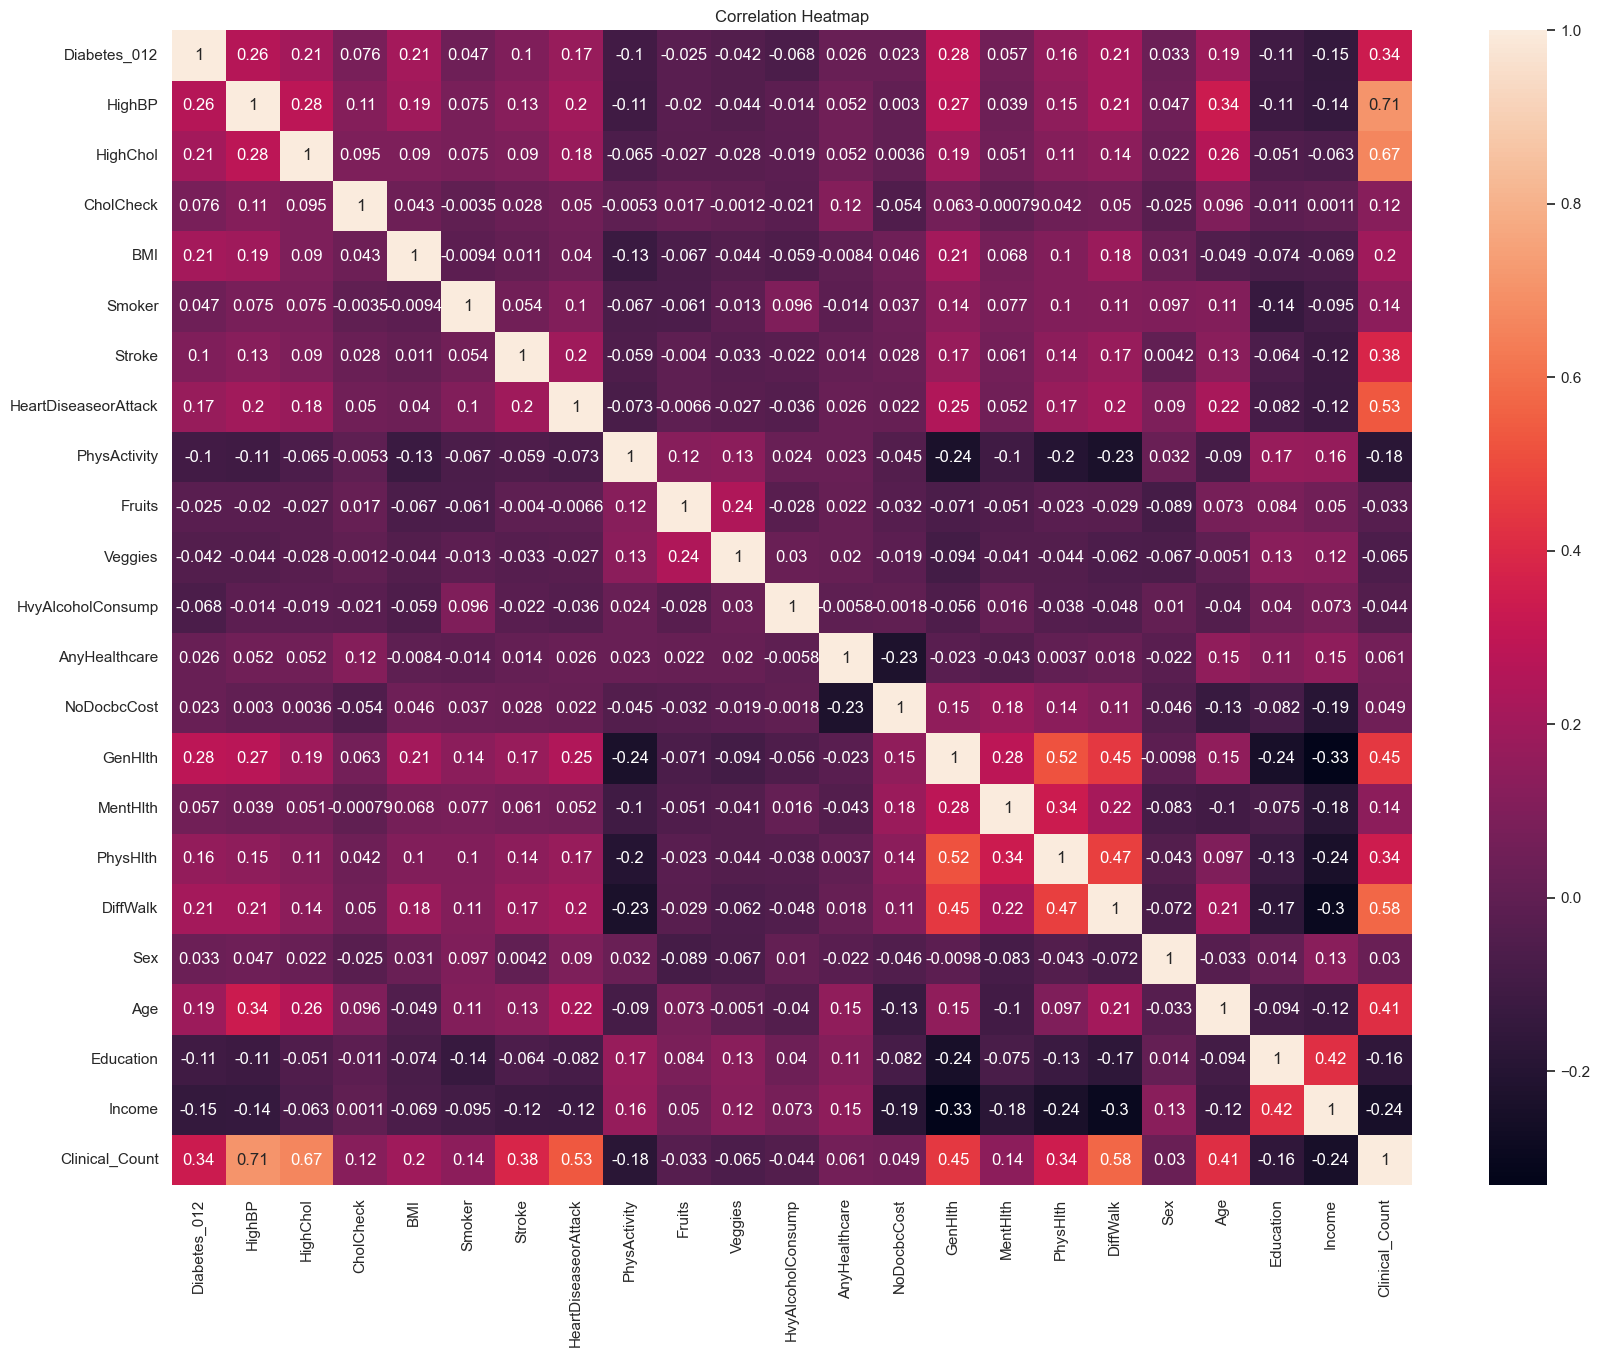

In [27]:
df = df.drop("Diabetes_binary", axis=1)
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

In [28]:
print("\n=== Correlation with Target ===")
target_corr = df.corr()['Diabetes_012'].sort_values(ascending=False)
print(target_corr)


=== Correlation with Target ===
Diabetes_012            1.000000
Clinical_Count          0.337814
GenHlth                 0.284888
HighBP                  0.264189
BMI                     0.212270
DiffWalk                0.209928
HighChol                0.205125
Age                     0.186381
HeartDiseaseorAttack    0.170686
PhysHlth                0.159474
Stroke                  0.099806
CholCheck               0.076423
MentHlth                0.056562
Smoker                  0.046522
Sex                     0.033229
AnyHealthcare           0.025624
NoDocbcCost             0.022729
Fruits                 -0.024520
Veggies                -0.042448
HvyAlcoholConsump      -0.067970
PhysActivity           -0.102370
Education              -0.106717
Income                 -0.145902
Name: Diabetes_012, dtype: float64
